In [3]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


data= pd.read_csv(r"F:\LAMBTON_COLLEGE\big_data\Assinment_1\Walmart_sales.csv")
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [4]:
data.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
pd.options.display.float_format = '{:,.0f}'.format

In [7]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,"6,435","6,435","6,435","6,435","6,435","6,435","6,435"
mean,23,"1,046,965",0,61,3,172,8
std,13,"564,367",0,18,0,39,2
min,1,"209,986",0,-2,2,126,4
25%,12,"553,350",0,47,3,132,7
50%,23,"960,746",0,63,3,183,8
75%,34,"1,420,159",0,75,4,213,9
max,45,"3,818,686",1,100,4,227,14


In [8]:
data.columns = data.columns.str.lower()

In [9]:
data.columns

Index(['store', 'date', 'weekly_sales', 'holiday_flag', 'temperature',
       'fuel_price', 'cpi', 'unemployment'],
      dtype='object')

# Checking Missing values

In [10]:
data.isna().sum()

store           0
date            0
weekly_sales    0
holiday_flag    0
temperature     0
fuel_price      0
cpi             0
unemployment    0
dtype: int64

In [11]:
# checking duplicates
data.duplicated().sum()

0

# Feature Engineering

In [12]:
# Correcting the date format
data['date'] = pd.to_datetime(data['date'], format = "%d-%m-%Y")

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   store         6435 non-null   int64         
 1   date          6435 non-null   datetime64[ns]
 2   weekly_sales  6435 non-null   float64       
 3   holiday_flag  6435 non-null   int64         
 4   temperature   6435 non-null   float64       
 5   fuel_price    6435 non-null   float64       
 6   cpi           6435 non-null   float64       
 7   unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [14]:
import calendar
data['year'] = data['date'].dt.year

In [15]:
data.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year
0,1,2010-02-05,"1,643,691",0,42,3,211,8,2010
1,1,2010-02-12,"1,641,957",1,39,3,211,8,2010
2,1,2010-02-19,"1,611,968",0,40,3,211,8,2010
3,1,2010-02-26,"1,409,728",0,47,3,211,8,2010
4,1,2010-03-05,"1,554,807",0,46,3,211,8,2010


In [16]:
data['quarter'] = data['date'].dt.quarter
data.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year,quarter
0,1,2010-02-05,"1,643,691",0,42,3,211,8,2010,1
1,1,2010-02-12,"1,641,957",1,39,3,211,8,2010,1
2,1,2010-02-19,"1,611,968",0,40,3,211,8,2010,1
3,1,2010-02-26,"1,409,728",0,47,3,211,8,2010,1
4,1,2010-03-05,"1,554,807",0,46,3,211,8,2010,1


In [17]:
data['quarter'].value_counts()

quarter
3    1800
2    1755
1    1485
4    1395
Name: count, dtype: int64

In [18]:
def Sesson_getter(quarter):
    if quarter ==1:
        return 'Winter'
    elif quarter == 2:
        return 'Spring'
    elif quarter == 3:
        return 'Summer'
    else:
        return 'Fall'

In [19]:
data['season'] = data['quarter'].apply(Sesson_getter)
data.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year,quarter,season
0,1,2010-02-05,"1,643,691",0,42,3,211,8,2010,1,Winter
1,1,2010-02-12,"1,641,957",1,39,3,211,8,2010,1,Winter
2,1,2010-02-19,"1,611,968",0,40,3,211,8,2010,1,Winter
3,1,2010-02-26,"1,409,728",0,47,3,211,8,2010,1,Winter
4,1,2010-03-05,"1,554,807",0,46,3,211,8,2010,1,Winter


In [20]:
data['season'].value_counts()

season
Summer    1800
Spring    1755
Winter    1485
Fall      1395
Name: count, dtype: int64

In [21]:
data['month'] = data['date'].dt.month
data.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year,quarter,season,month
0,1,2010-02-05,"1,643,691",0,42,3,211,8,2010,1,Winter,2
1,1,2010-02-12,"1,641,957",1,39,3,211,8,2010,1,Winter,2
2,1,2010-02-19,"1,611,968",0,40,3,211,8,2010,1,Winter,2
3,1,2010-02-26,"1,409,728",0,47,3,211,8,2010,1,Winter,2
4,1,2010-03-05,"1,554,807",0,46,3,211,8,2010,1,Winter,3


In [22]:
data['month_name'] = data['date'].dt.month_name()

In [23]:
data.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year,quarter,season,month,month_name
0,1,2010-02-05,"1,643,691",0,42,3,211,8,2010,1,Winter,2,February
1,1,2010-02-12,"1,641,957",1,39,3,211,8,2010,1,Winter,2,February
2,1,2010-02-19,"1,611,968",0,40,3,211,8,2010,1,Winter,2,February
3,1,2010-02-26,"1,409,728",0,47,3,211,8,2010,1,Winter,2,February
4,1,2010-03-05,"1,554,807",0,46,3,211,8,2010,1,Winter,3,March


array([[<Axes: title={'center': 'store'}>,
        <Axes: title={'center': 'date'}>,
        <Axes: title={'center': 'weekly_sales'}>],
       [<Axes: title={'center': 'holiday_flag'}>,
        <Axes: title={'center': 'temperature'}>,
        <Axes: title={'center': 'fuel_price'}>],
       [<Axes: title={'center': 'cpi'}>,
        <Axes: title={'center': 'unemployment'}>,
        <Axes: title={'center': 'year'}>],
       [<Axes: title={'center': 'quarter'}>,
        <Axes: title={'center': 'month'}>, <Axes: >]], dtype=object)

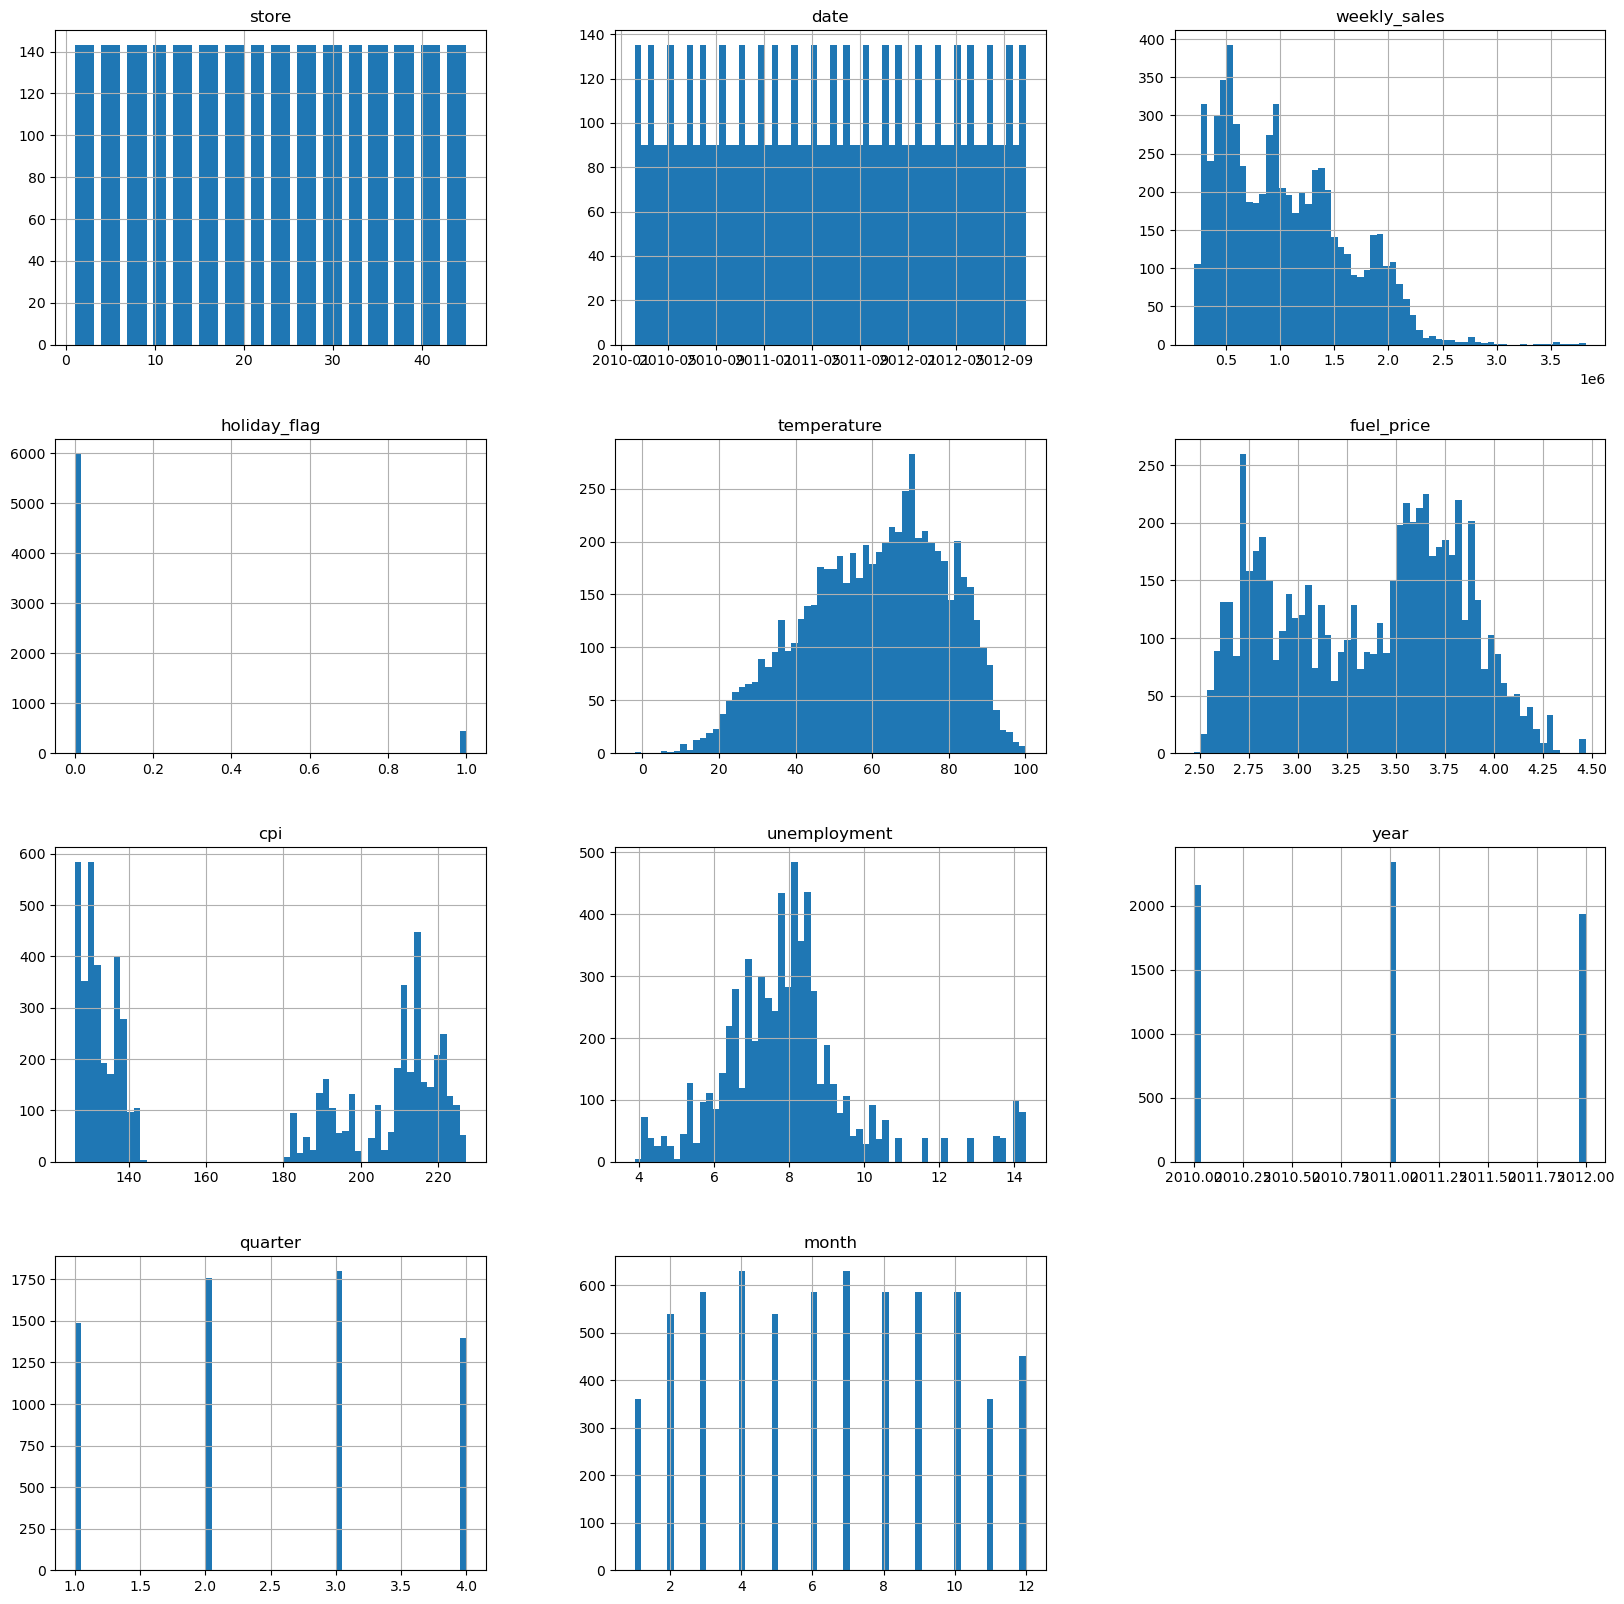

In [24]:
data.hist(bins=60,figsize=(20,20))

In [25]:
data.columns

Index(['store', 'date', 'weekly_sales', 'holiday_flag', 'temperature',
       'fuel_price', 'cpi', 'unemployment', 'year', 'quarter', 'season',
       'month', 'month_name'],
      dtype='object')

'The code snippet extracts specific columns from a DataFrame, computes the correlation between them,\nand then visualizes the correlation matrix as a heatmap using Seaborn. This approach helps in understanding \nthe relationships between variables by displaying the strength and direction of correlations through color gradients.\n The heatmap with annotations provides a quick overview of how each variable relates to others,\naiding in identifying patterns and potential insights within the data.'

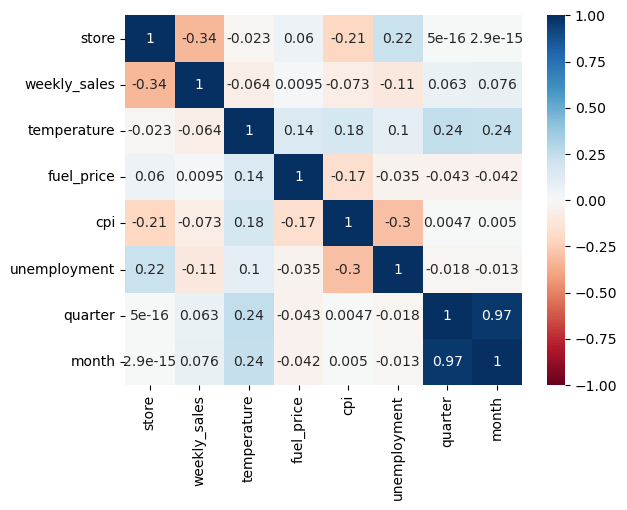

In [26]:
df=data[['store','weekly_sales','temperature','fuel_price','cpi','unemployment','quarter','month']]
corr=df.corr()
corr
sns.heatmap(corr,cmap='RdBu',vmin=-1,vmax=1,annot=True)

"""The code snippet extracts specific columns from a DataFrame, computes the correlation between them,
and then visualizes the correlation matrix as a heatmap using Seaborn. This approach helps in understanding 
the relationships between variables by displaying the strength and direction of correlations through color gradients.
 The heatmap with annotations provides a quick overview of how each variable relates to others,
aiding in identifying patterns and potential insights within the data."""

In [27]:
data['month_name'].value_counts()



month_name
April        630
July         630
March        585
June         585
August       585
September    585
October      585
February     540
May          540
December     450
November     360
January      360
Name: count, dtype: int64

"""To count the occurrences of each unique value in the 'month_name' column, 
you can use the value_counts() function in Python. This function returns a Series containing counts of unique values."""

In [28]:
data['week'] = data['date'].dt.isocalendar().week
data.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year,quarter,season,month,month_name,week
0,1,2010-02-05,"1,643,691",0,42,3,211,8,2010,1,Winter,2,February,5
1,1,2010-02-12,"1,641,957",1,39,3,211,8,2010,1,Winter,2,February,6
2,1,2010-02-19,"1,611,968",0,40,3,211,8,2010,1,Winter,2,February,7
3,1,2010-02-26,"1,409,728",0,47,3,211,8,2010,1,Winter,2,February,8
4,1,2010-03-05,"1,554,807",0,46,3,211,8,2010,1,Winter,3,March,9


"""To add a 'week' column to a DataFrame based on the 'date' column, you can use the isocalendar().week method in pandas. This method extracts the week number from a datetime column."""

In [29]:
data['day_of_week'] = data['date'].dt.day_name()
data.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year,quarter,season,month,month_name,week,day_of_week
0,1,2010-02-05,"1,643,691",0,42,3,211,8,2010,1,Winter,2,February,5,Friday
1,1,2010-02-12,"1,641,957",1,39,3,211,8,2010,1,Winter,2,February,6,Friday
2,1,2010-02-19,"1,611,968",0,40,3,211,8,2010,1,Winter,2,February,7,Friday
3,1,2010-02-26,"1,409,728",0,47,3,211,8,2010,1,Winter,2,February,8,Friday
4,1,2010-03-05,"1,554,807",0,46,3,211,8,2010,1,Winter,3,March,9,Friday


"""To add a 'day_of_week' column to a DataFrame in Python using pandas, you can extract the day name from a 'date' column and assign it to the new column."""

In [30]:
data.shape

(6435, 15)

"""In Python, the shape attribute is commonly used with libraries like NumPy or Pandas to determine the dimensions of a dataset. When you call data.shape, it returns a tuple representing the number of rows and columns in the dataset. For example, if you have a dataset named data, data.shape would output (rows, columns). This information is crucial for data manipulation, analysis, and visualization tasks as it provides insights into the structure of the dataset at hand.

"""

# Exploratory Data Analysis (EDA)
- Univariate Analysis
- Bi-variate Analysis
- Time Series Analysis

### Univariate Analysis
#### Numerical Features
- weekly sales
- temperature
- fuel price
- cpi
- unemployment

In [31]:
data.columns

Index(['store', 'date', 'weekly_sales', 'holiday_flag', 'temperature',
       'fuel_price', 'cpi', 'unemployment', 'year', 'quarter', 'season',
       'month', 'month_name', 'week', 'day_of_week'],
      dtype='object')

In [32]:
data[['weekly_sales','temperature','fuel_price', 'cpi', 'unemployment']].describe()

,weekly_sales,temperature,fuel_price,cpi,unemployment
count,"6,435","6,435","6,435","6,435","6,435"
mean,"1,046,965",61,3,172,8
std,"564,367",18,0,39,2
min,"209,986",-2,2,126,4
25%,"553,350",47,3,132,7
50%,"960,746",63,3,183,8
75%,"1,420,159",75,4,213,9
max,"3,818,686",100,4,227,14


#### Conclusion:
- weekly_sales is right skewed
- Temp and unemployment are normal dist.
- rests are bimodal

In [33]:
data

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year,quarter,season,month,month_name,week,day_of_week
0,1,2010-02-05,"1,643,691",0,42,3,211,8,2010,1,Winter,2,February,5,Friday
1,1,2010-02-12,"1,641,957",1,39,3,211,8,2010,1,Winter,2,February,6,Friday
2,1,2010-02-19,"1,611,968",0,40,3,211,8,2010,1,Winter,2,February,7,Friday
3,1,2010-02-26,"1,409,728",0,47,3,211,8,2010,1,Winter,2,February,8,Friday
4,1,2010-03-05,"1,554,807",0,46,3,211,8,2010,1,Winter,3,March,9,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,"713,174",0,65,4,192,9,2012,3,Summer,9,September,39,Friday
6431,45,2012-10-05,"733,455",0,65,4,192,9,2012,4,Fall,10,October,40,Friday
6432,45,2012-10-12,"734,464",0,54,4,192,9,2012,4,Fall,10,October,41,Friday
6433,45,2012-10-19,"718,126",0,56,4,192,9,2012,4,Fall,10,October,42,Friday


In [34]:
x_val=['store', 'temperature',
       'week', 'unemployment','fuel_price','cpi','month']
y_val=['weekly_sales']
X_train = data[x_val]
Y_train = data[y_val]
X_test = data[x_val]
Y_test = data[y_val]

from sklearn.linear_model import LinearRegression

lm=LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

The code snippet initializes training data X_train and Y_train by selecting specific columns from the dataset. It then fits a Linear Regression model lm to the training data using lm.fit(X_train, Y_train). This process trains the model to learn the relationship between the input features (X_train) and the target variable (Y_train). The trained model can then be used to make predictions on new data.

In [35]:
print(lm.intercept_)

[1858612.17747583]


By executing these commands, you can gain insights into the model's intercept,

To access the intercept in a linear regression model in Python, you can use the intercept_ attribute of the linear regression model object.
By using lm.intercept_, you can retrieve the intercept value of the linear regression model.

In [36]:
lm.coef_

array([[-15433.20456386,  -1893.71618298,  -8759.84824122,
        -19775.9274579 ,  21252.85301724,  -2197.04878706,
         53995.14071472]])


 coefficients, make predictions,

In [37]:
X_train.columns

Index(['store', 'temperature', 'week', 'unemployment', 'fuel_price', 'cpi',
       'month'],
      dtype='object')

In [38]:
prediction=lm.predict(X_test)

In [39]:
prediction

array([[1257816.55368354],
       [1255422.40326629],
       [1243147.67885028],
       ...,
       [ 732825.94449768],
       [ 719611.94067829],
       [ 704544.28657432]])

In [40]:
Y_test

,weekly_sales
0,"1,643,691"
1,"1,641,957"
2,"1,611,968"
3,"1,409,728"
4,"1,554,807"
...,...
6430,"713,174"
6431,"733,455"
6432,"734,464"
6433,"718,126"


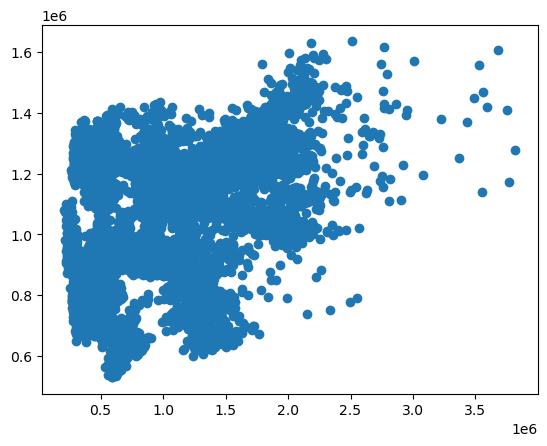

In [41]:
plt.scatter(Y_test,prediction)

 visualize the relationship between predicted and actual values.

c:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


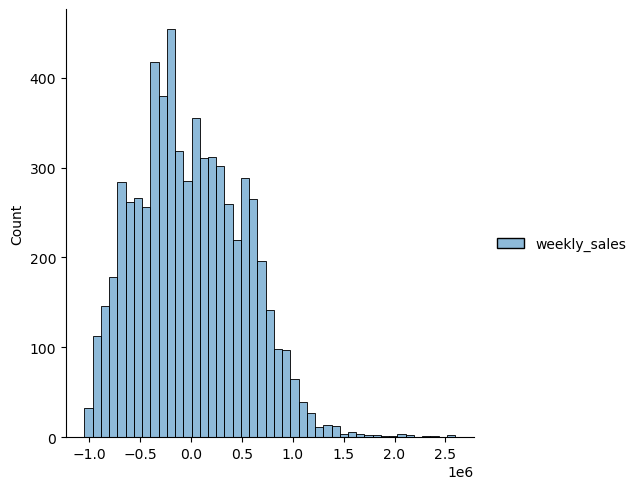

In [42]:
sns.displot((Y_test-prediction))

<Axes: ylabel='Count'>

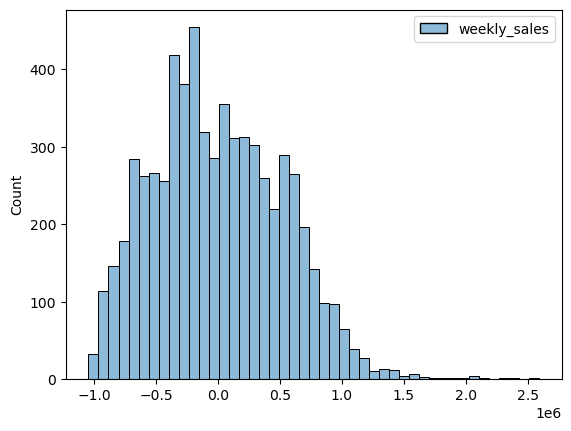

In [43]:
sns.histplot((Y_test-prediction))

In [44]:
from sklearn import metrics
print("MAE: ",metrics.mean_absolute_error(Y_test,prediction))
print("MSE: ",metrics.mean_squared_error(Y_test,prediction))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(Y_test,prediction)))

MAE:  429750.7648425463
MSE:  271124838336.07242
RMSE:  520696.49349316


By utilizing the metrics module from scikit-learn, you can easily compute these metrics to evaluate the performance of your regression model.

In [45]:
np.mean(data['weekly_sales'])

1046964.8775617715

By utilizing NumPy's np.mean() function, you can efficiently compute the average value of the 'weekly_sales' column in your dataset.